In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
import analysis_functions as af
import seaborn as sns
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import numpy as np
import pandas as pd

# Load Data
1) Download the data from - https://drive.google.com/drive/u/0/folders/1sSlBhdsVyycRpMU5o9AW8dJiltrCIwH6
2) Extract the data to a folder (e.g. Data\1. COMPETITION_data_raw_static\ & Data\2. COMPETITION_data_raw_dynamic)
3) Set the data_path location to the location of the folders (1. COMPETITION_data_raw_static/ & 2. COMPETITION_data_raw_dynamic)

In [3]:
df = af.get_data(data_path='Data/') # the set data_path to the location of the 
df_postprocess = af.post_process(df)
rolling_data = af.collect_rolling_avereage(df_postprocess, rw=10)

Loading from cache


  0%|          | 0/20 [00:00<?, ?it/s]

# Create Summary Table

In [4]:
summary_table, summary_table_condenced = af.create_summary_table(df_postprocess)
summary_table_condenced.to_excel('outputs/summary_table_condenced_T1.xlsx')
summary_table_condenced.to_csv('outputs/summary_table_condenced_T1.csv')

summary_table_condenced

,Bias,Detected Rewards (B+),Detected Rewards (B-),$Δ_{Rewards}$:[(B+)-(B-)],$Δ_{Rewards}$ (Norm.):[(B+)-(B-)]:[(B+)-(B-)],Observed Expectancy (B+),Observed Expectancy (B-),$Δ_{RT}$:[(B+)-(B-)],Bias vs. Norm. $Δ_{Rewards}$ (Cor.),Bias vs. Total Rewards (Cor.),Bias vs. Delta RT (Cor.)
Model/Schedule,,,,,,,,,,,
RaCaS,"µ=0.70, σ=0.17, P<1e-8","µ=18.42, σ=6.15, P<1e-8","µ=6.96, σ=7.77, P<1e-8","µ=11.46, σ=13.52, P<1e-8","µ=0.49, σ=0.55, P<1e-8","µ=0.26, σ=0.06, P<0.05","µ=0.17, σ=0.15, P<1e-8","µ=-0.08, σ=0.26, P<1e-6","R=0.91, P<1e-8","R=-0.39, P<1e-8","R=-0.38, P<1e-8"
Control (pooled),"µ=0.62, σ=0.15, P<1e-8","µ=17.38, σ=4.82, P<1e-8","µ=12.09, σ=6.88, P<1e-3","µ=5.28, σ=9.64, P<1e-8","µ=0.22, σ=0.39, P<1e-8","µ=0.28, σ=0.06, P<1e-8","µ=0.30, σ=0.16, P<1e-8","µ=0.02, σ=0.22, P<1e-8","R=0.88, P<1e-8","R=-0.15, P<1e-8","R=-0.15, P<1e-8"
SS01,"µ=0.65, σ=0.12, P<1e-8","µ=20.06, σ=2.85, P<1e-8","µ=11.07, σ=4.94, P<1e-8","µ=8.99, σ=6.20, P<1e-8","µ=0.32, σ=0.27, P<1e-8","µ=0.32, σ=0.05, P<1e-8","µ=0.30, σ=0.11, P<1e-8","µ=0.05, σ=0.21, P<1e-8","R=0.90, P<1e-8","R=-0.50, P<1e-8","R=-0.13, P<0.01"
SS02,"µ=0.64, σ=0.15, P<1e-8","µ=17.46, σ=4.45, P<1e-8","µ=7.72, σ=4.98, P<1e-8","µ=9.74, σ=9.04, P<1e-8","µ=0.40, σ=0.38, P<1e-8","µ=0.27, σ=0.05, P<1e-8","µ=0.20, σ=0.09, P<1e-8","µ=0.00, σ=0.20, P=0.86","R=0.91, P<1e-8","R=-0.21, P<1e-6","R=-0.06, P=0.13"
DS03,"µ=0.63, σ=0.15, P<1e-8","µ=16.25, σ=5.91, P<1e-8","µ=12.43, σ=5.22, P=0.87","µ=3.82, σ=9.38, P<1e-5","µ=0.13, σ=0.37, P<1e-4","µ=0.25, σ=0.07, P=0.71","µ=0.35, σ=0.15, P<1e-8","µ=0.03, σ=0.24, P=0.09","R=0.92, P<1e-8","R=0.14, P=0.10","R=-0.10, P=0.25"
SS03,"µ=0.63, σ=0.15, P<1e-8","µ=17.57, σ=4.04, P<1e-8","µ=15.35, σ=7.08, P<1e-8","µ=2.22, σ=9.31, P<1e-8","µ=0.11, σ=0.37, P<1e-8","µ=0.28, σ=0.04, P<1e-8","µ=0.41, σ=0.18, P<1e-8","µ=0.03, σ=0.20, P<1e-3","R=0.87, P<1e-8","R=-0.31, P<1e-8","R=-0.11, P<0.01"
SS04,"µ=0.61, σ=0.18, P<1e-8","µ=16.40, σ=5.39, P<1e-8","µ=8.11, σ=6.00, P<1e-8","µ=8.29, σ=11.05, P<1e-8","µ=0.35, σ=0.47, P<1e-8","µ=0.26, σ=0.06, P<0.05","µ=0.18, σ=0.10, P<1e-8","µ=-0.01, σ=0.22, P=0.73","R=0.93, P<1e-8","R=-0.20, P<0.01","R=-0.31, P<1e-5"
SS05,"µ=0.61, σ=0.14, P<1e-8","µ=17.72, σ=3.84, P<1e-8","µ=16.70, σ=7.07, P<1e-8","µ=1.02, σ=9.25, P=0.14","µ=0.07, σ=0.35, P<0.01","µ=0.29, σ=0.04, P<1e-8","µ=0.42, σ=0.18, P<1e-8","µ=0.02, σ=0.27, P=0.36","R=0.88, P<1e-8","R=-0.31, P<1e-4","R=-0.18, P<0.05"
SS06,"µ=0.61, σ=0.17, P<1e-8","µ=15.16, σ=4.62, P<1e-8","µ=9.29, σ=5.37, P<1e-8","µ=5.87, σ=9.60, P<1e-8","µ=0.26, σ=0.41, P<1e-8","µ=0.25, σ=0.04, P=0.27","µ=0.21, σ=0.09, P<1e-6","µ=0.00, σ=0.24, P=0.89","R=0.96, P<1e-8","R=-0.30, P<1e-3","R=-0.26, P<0.01"


### Figure 2 - The bias-generating performance of the RaCaS algorithm

DS01, mean = 0.7045801526717557 std = 0.16838718908874062
DS02, mean = 0.6926717557251908 std = 0.17365671010748554
RaCaS, mean = 0.6986259541984733 std = 0.1708184640965053


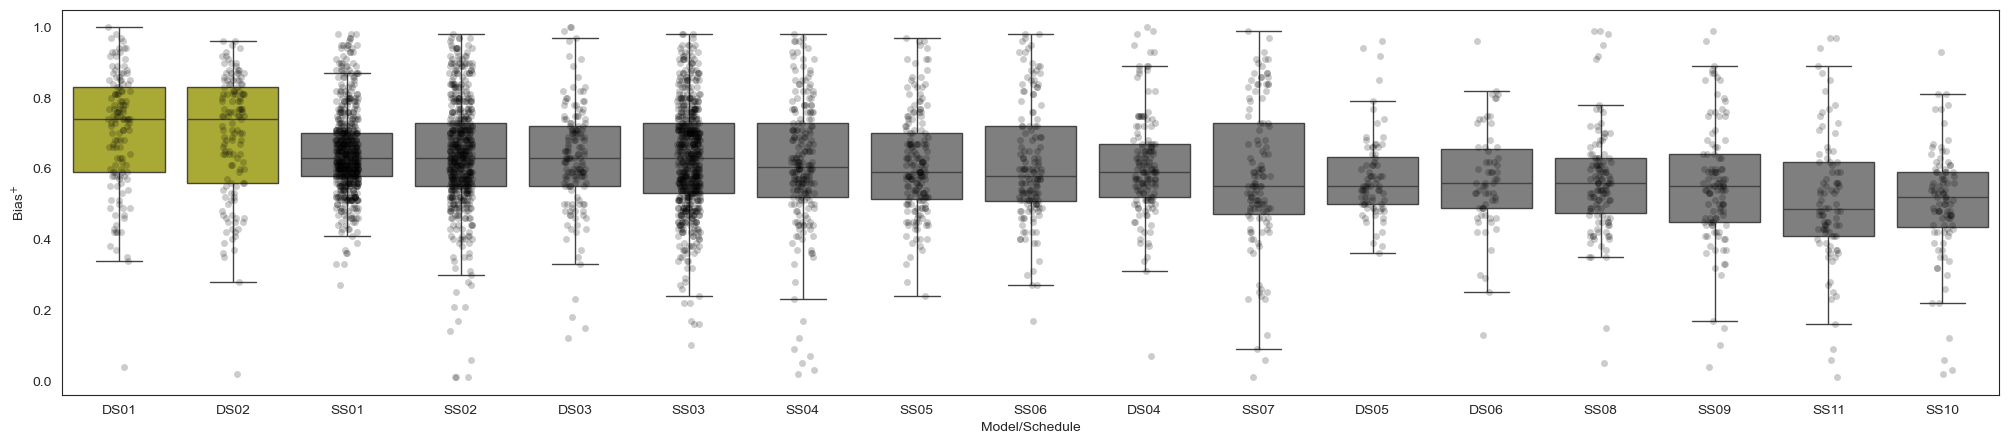

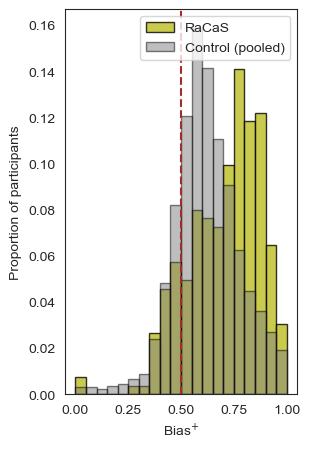

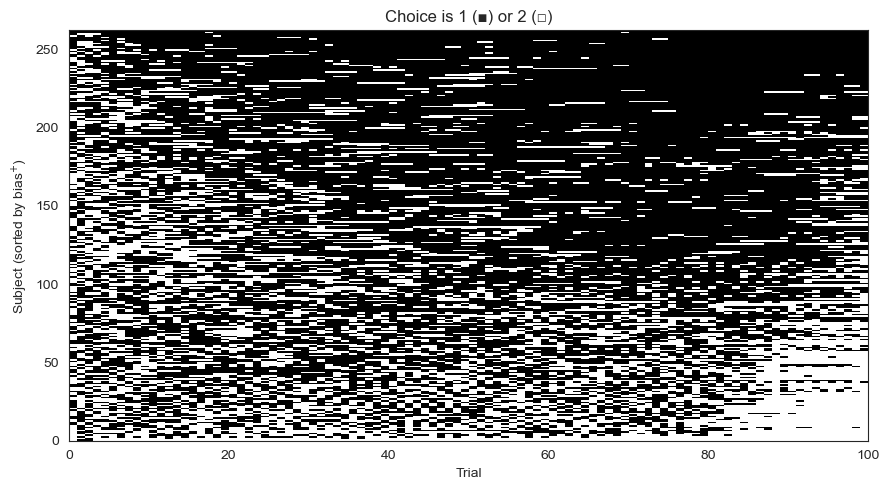

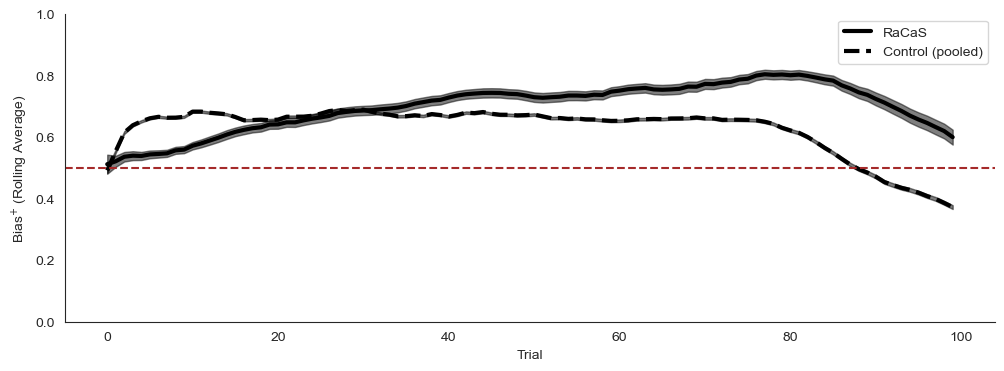

In [12]:
# Create filtered dataframes 
df_noPool_noSS00_noRaCaS = df_postprocess.query('`Model/Schedule` not in ["RaCaS", "Control (pooled)", "SS00"]') 
df_Pool_RaCaS = df_postprocess.query('`Model/Schedule` in ["RaCaS", "Control (pooled)"]')

af.Figure_2(df_noPool_noSS00_noRaCaS, df_Pool_RaCaS, rolling_data)



### Figure 3. Reward allocation, its relative discovery, and the subjects' empirical expectation in the context of RaCaS. 

c:\Users\oren\Downloads\Specious_Regularity\analysis_functions.py:747: RuntimeWarning: Mean of empty slice
  mn = np.nanmean(data[y],0)


Δ_Rewards (Norm.):[(B+)-(B-)]:[(B+)-(B-)]
RaCaS, mean = 0.4881552573210246 std = 0.5500959206906059
RaCaS, median = 0.7142857142857143


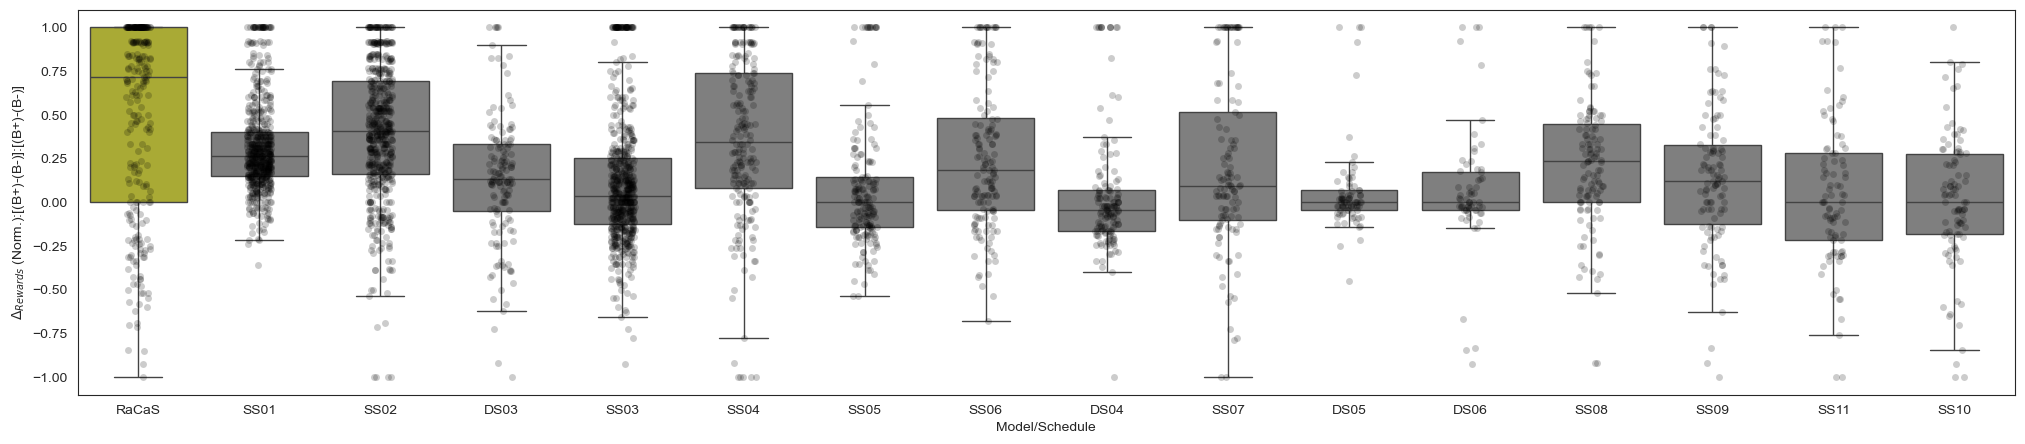

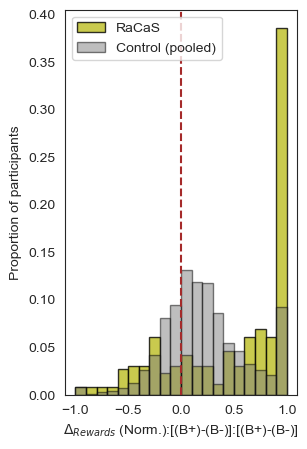

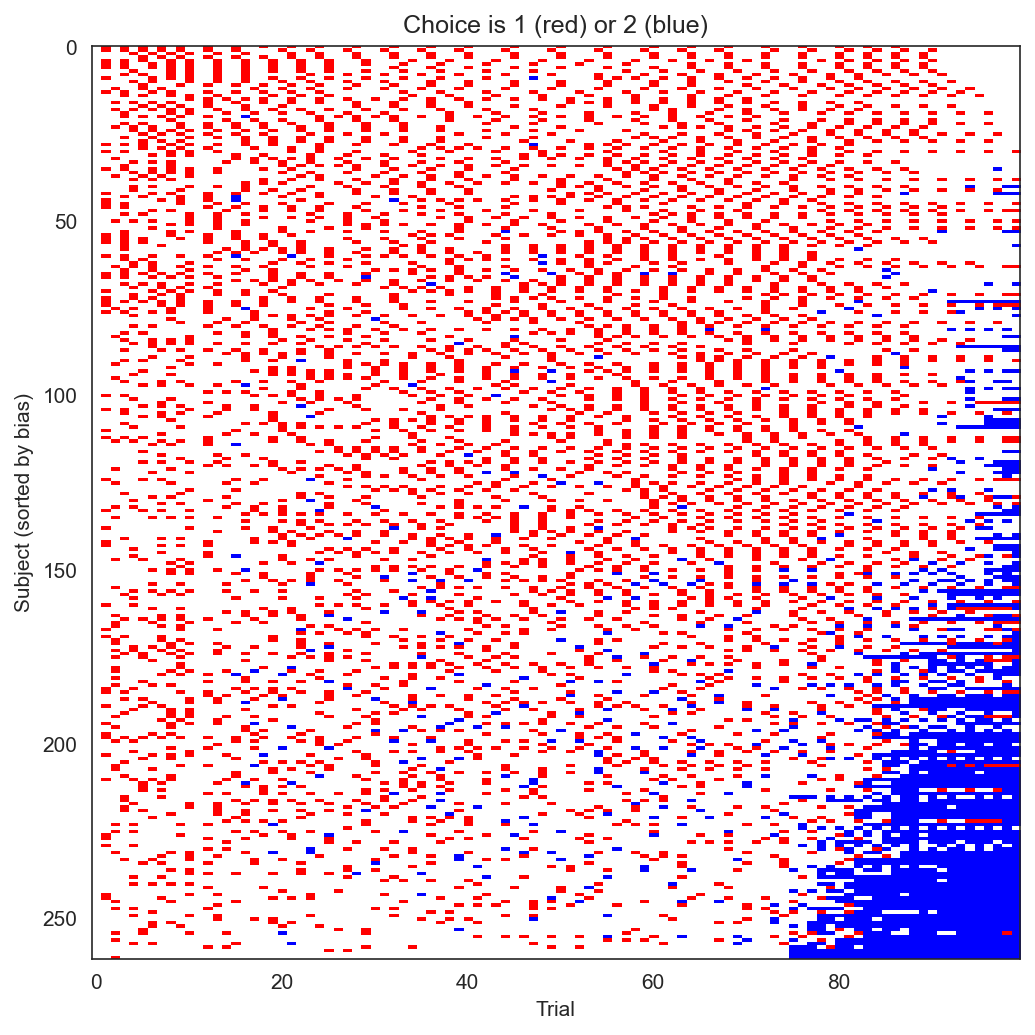

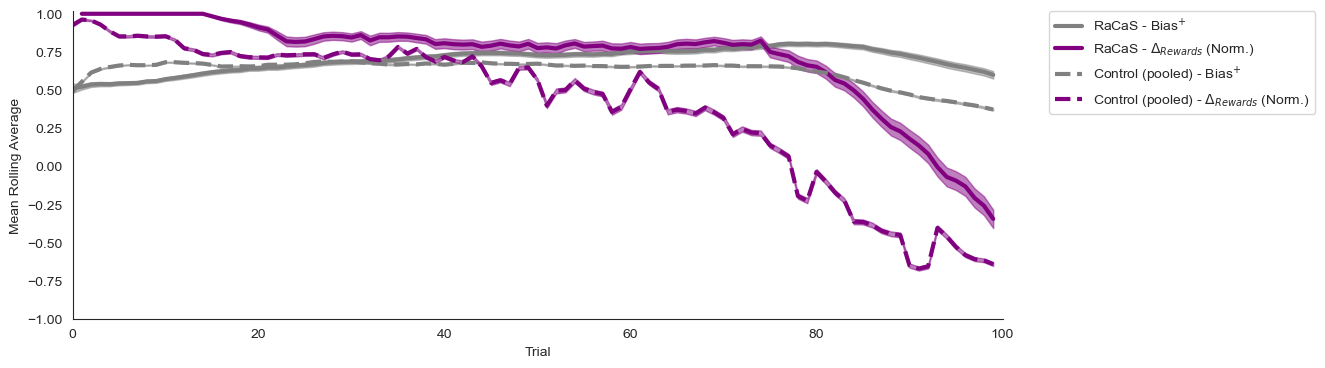

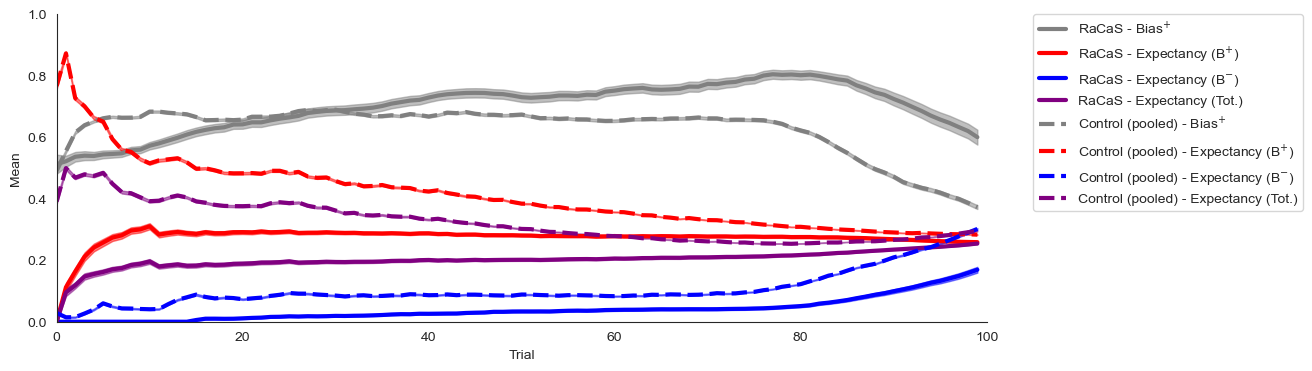

In [13]:
# Create filtered dataframes 
df_noPool_noSS00_noDS01_noDS02 = df_postprocess.query('`Model/Schedule` not in ["Control (pooled)", "SS00", "DS01", "DS02"]') 
df_Pool_RaCaS = df_postprocess.query('`Model/Schedule` in ["RaCaS", "Control (pooled)"]')


af.Figure_3(df_noPool_noSS00_noDS01_noDS02, df_Pool_RaCaS, rolling_data)



### Figure 4. Cost of bias for subjects in the context of RaCaS and all other competing  algorithms. 

c:\Users\oren\Downloads\Specious_Regularity\analysis_functions.py:509: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette=[colors[0]] + [colors[1]]*(len(sced_sort)-1), showfliers=False)
c:\Users\oren\Downloads\Specious_Regularity\analysis_functions.py:747: RuntimeWarning: Mean of empty slice
  sm = sem(data[y],0,nan_policy='omit')


RaCaS, mean = 25.38167938931298


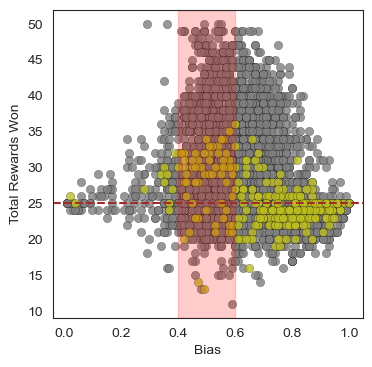

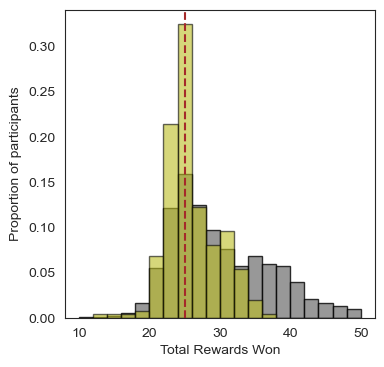

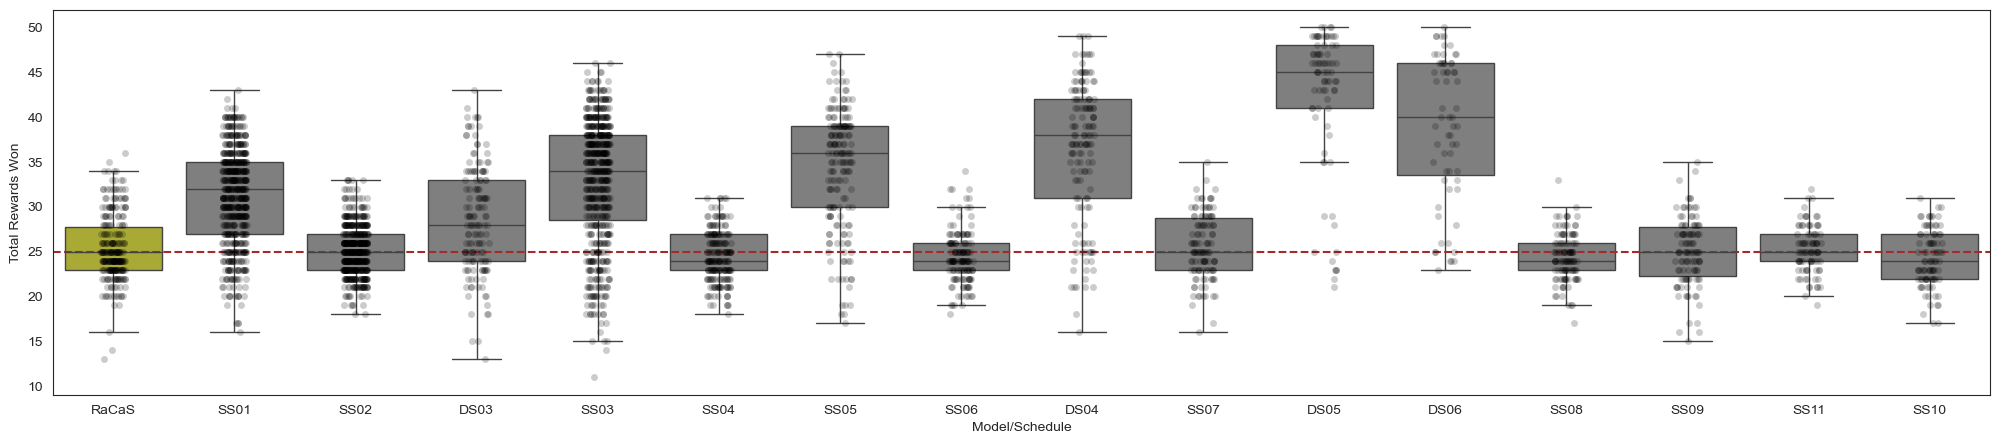

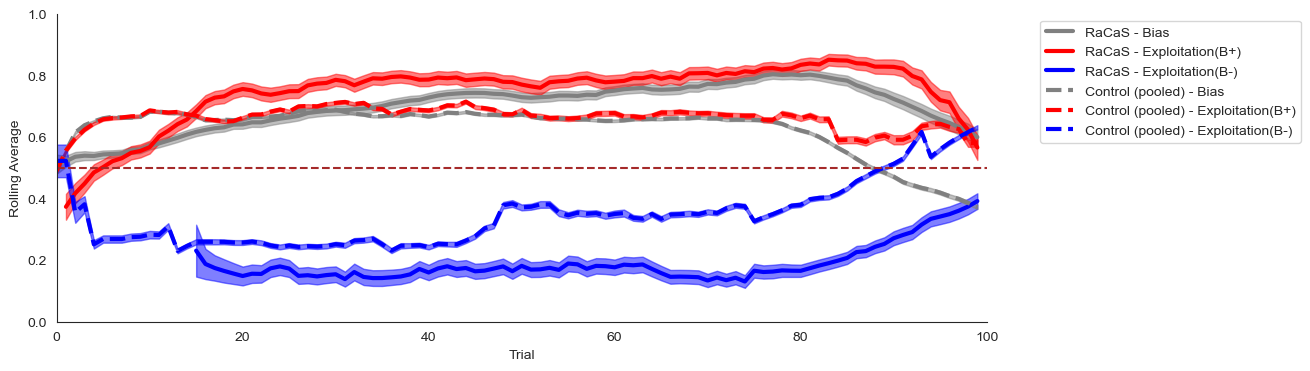

In [21]:
af.Figure_4(df_noPool_noSS00_noDS01_noDS02, df_Pool_RaCaS, rolling_data)

### Sup Figure 1

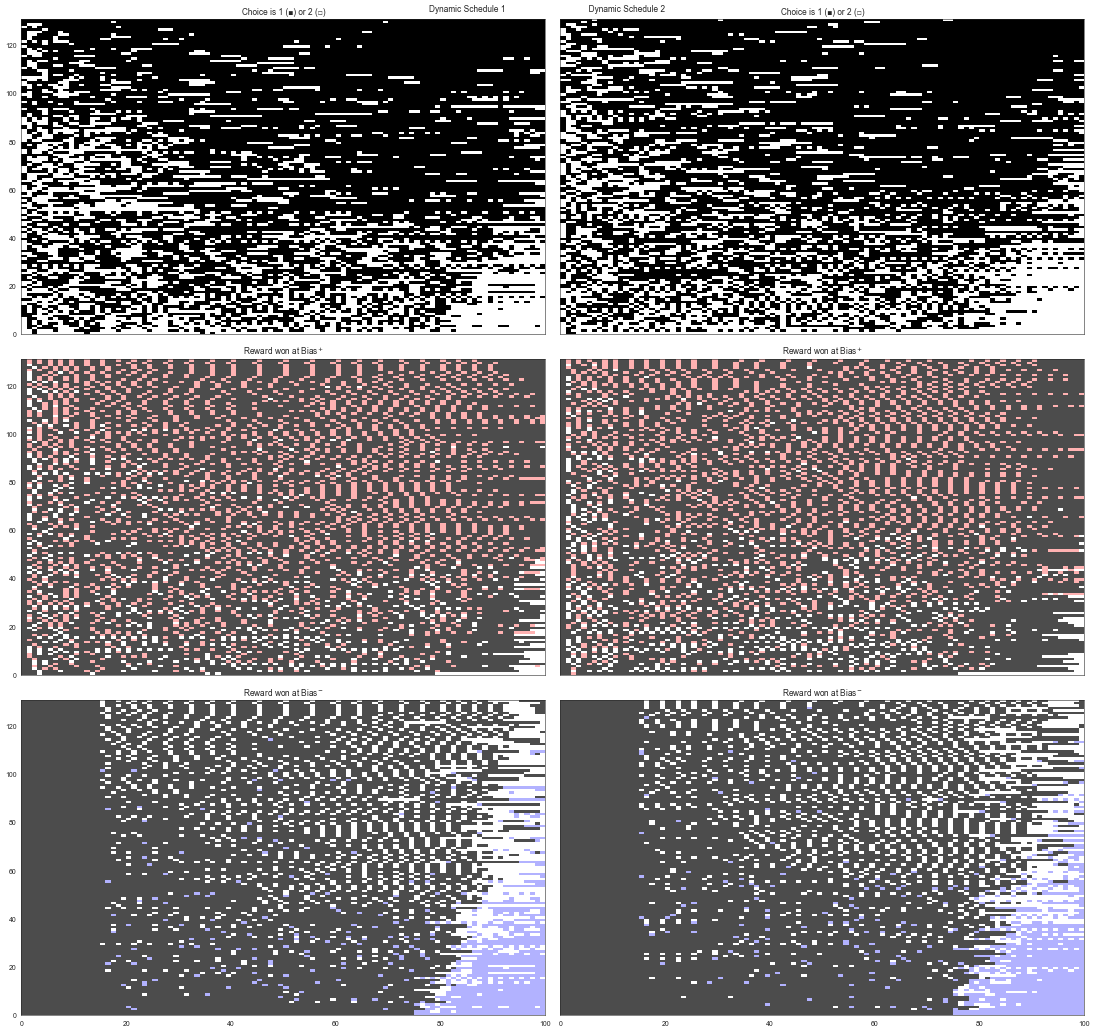

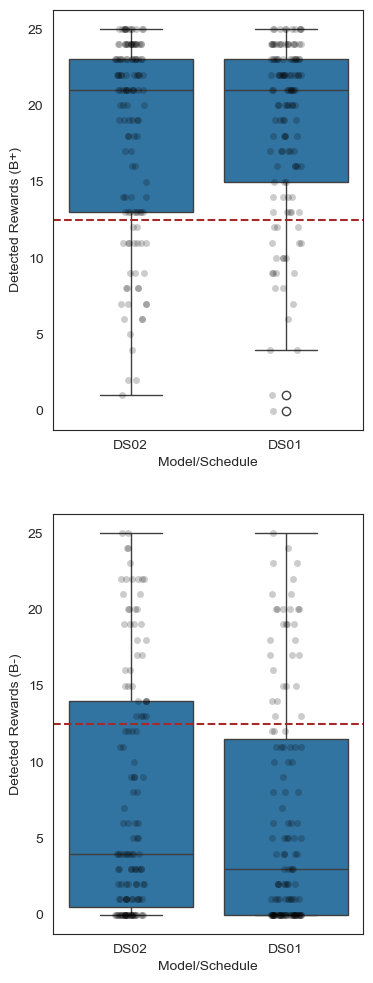

In [22]:
df_DS01_DS02 = df_postprocess.query('`Model/Schedule` in ["DS01", "DS02"]') 

af.Sup_Figure_1(df_DS01_DS02)

### Sup Figure 2

c:\Users\oren\Downloads\Specious_Regularity\analysis_functions.py:674: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  showfliers=False,palette=[colors[0]] + [colors[1]]*(len(sced_sort)-1))
c:\Users\oren\Downloads\Specious_Regularity\analysis_functions.py:676: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  showfliers=False,palette=[colors[0]] + [colors[1]]*(len(sced_sort)-1))


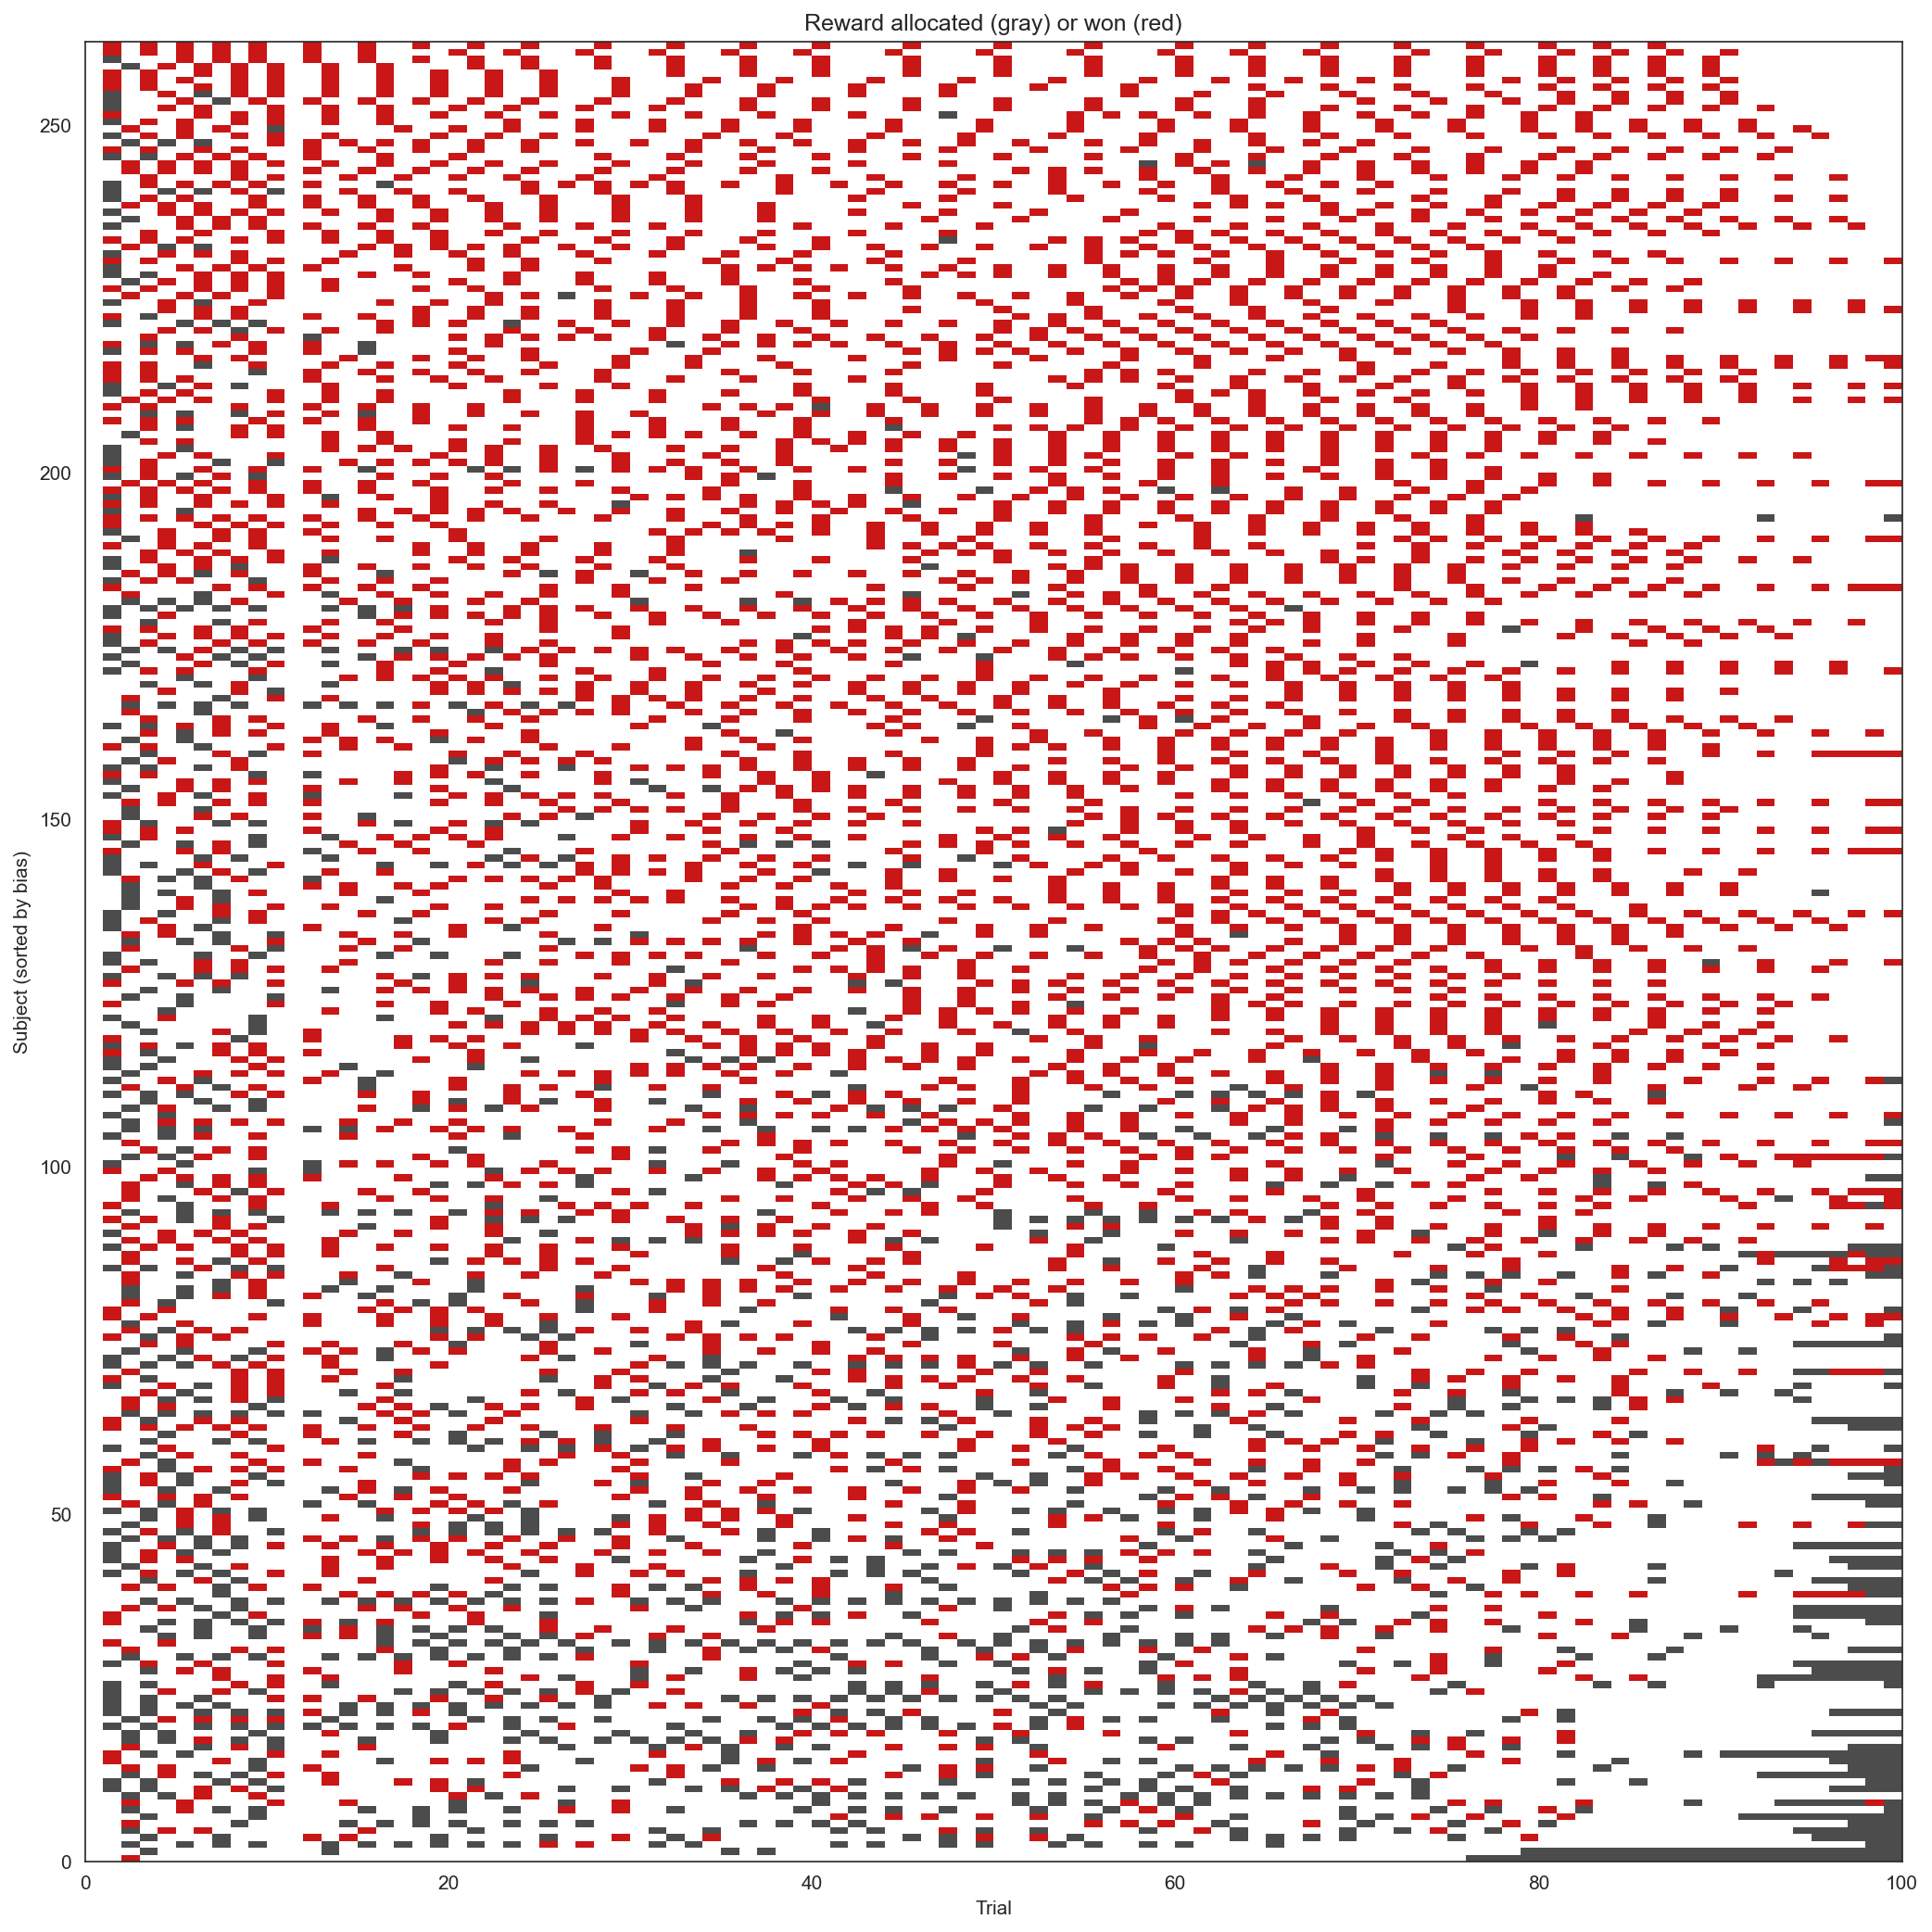

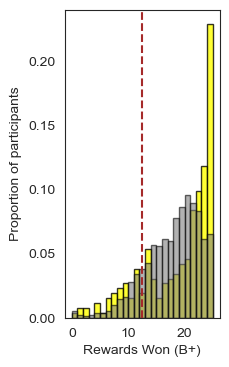

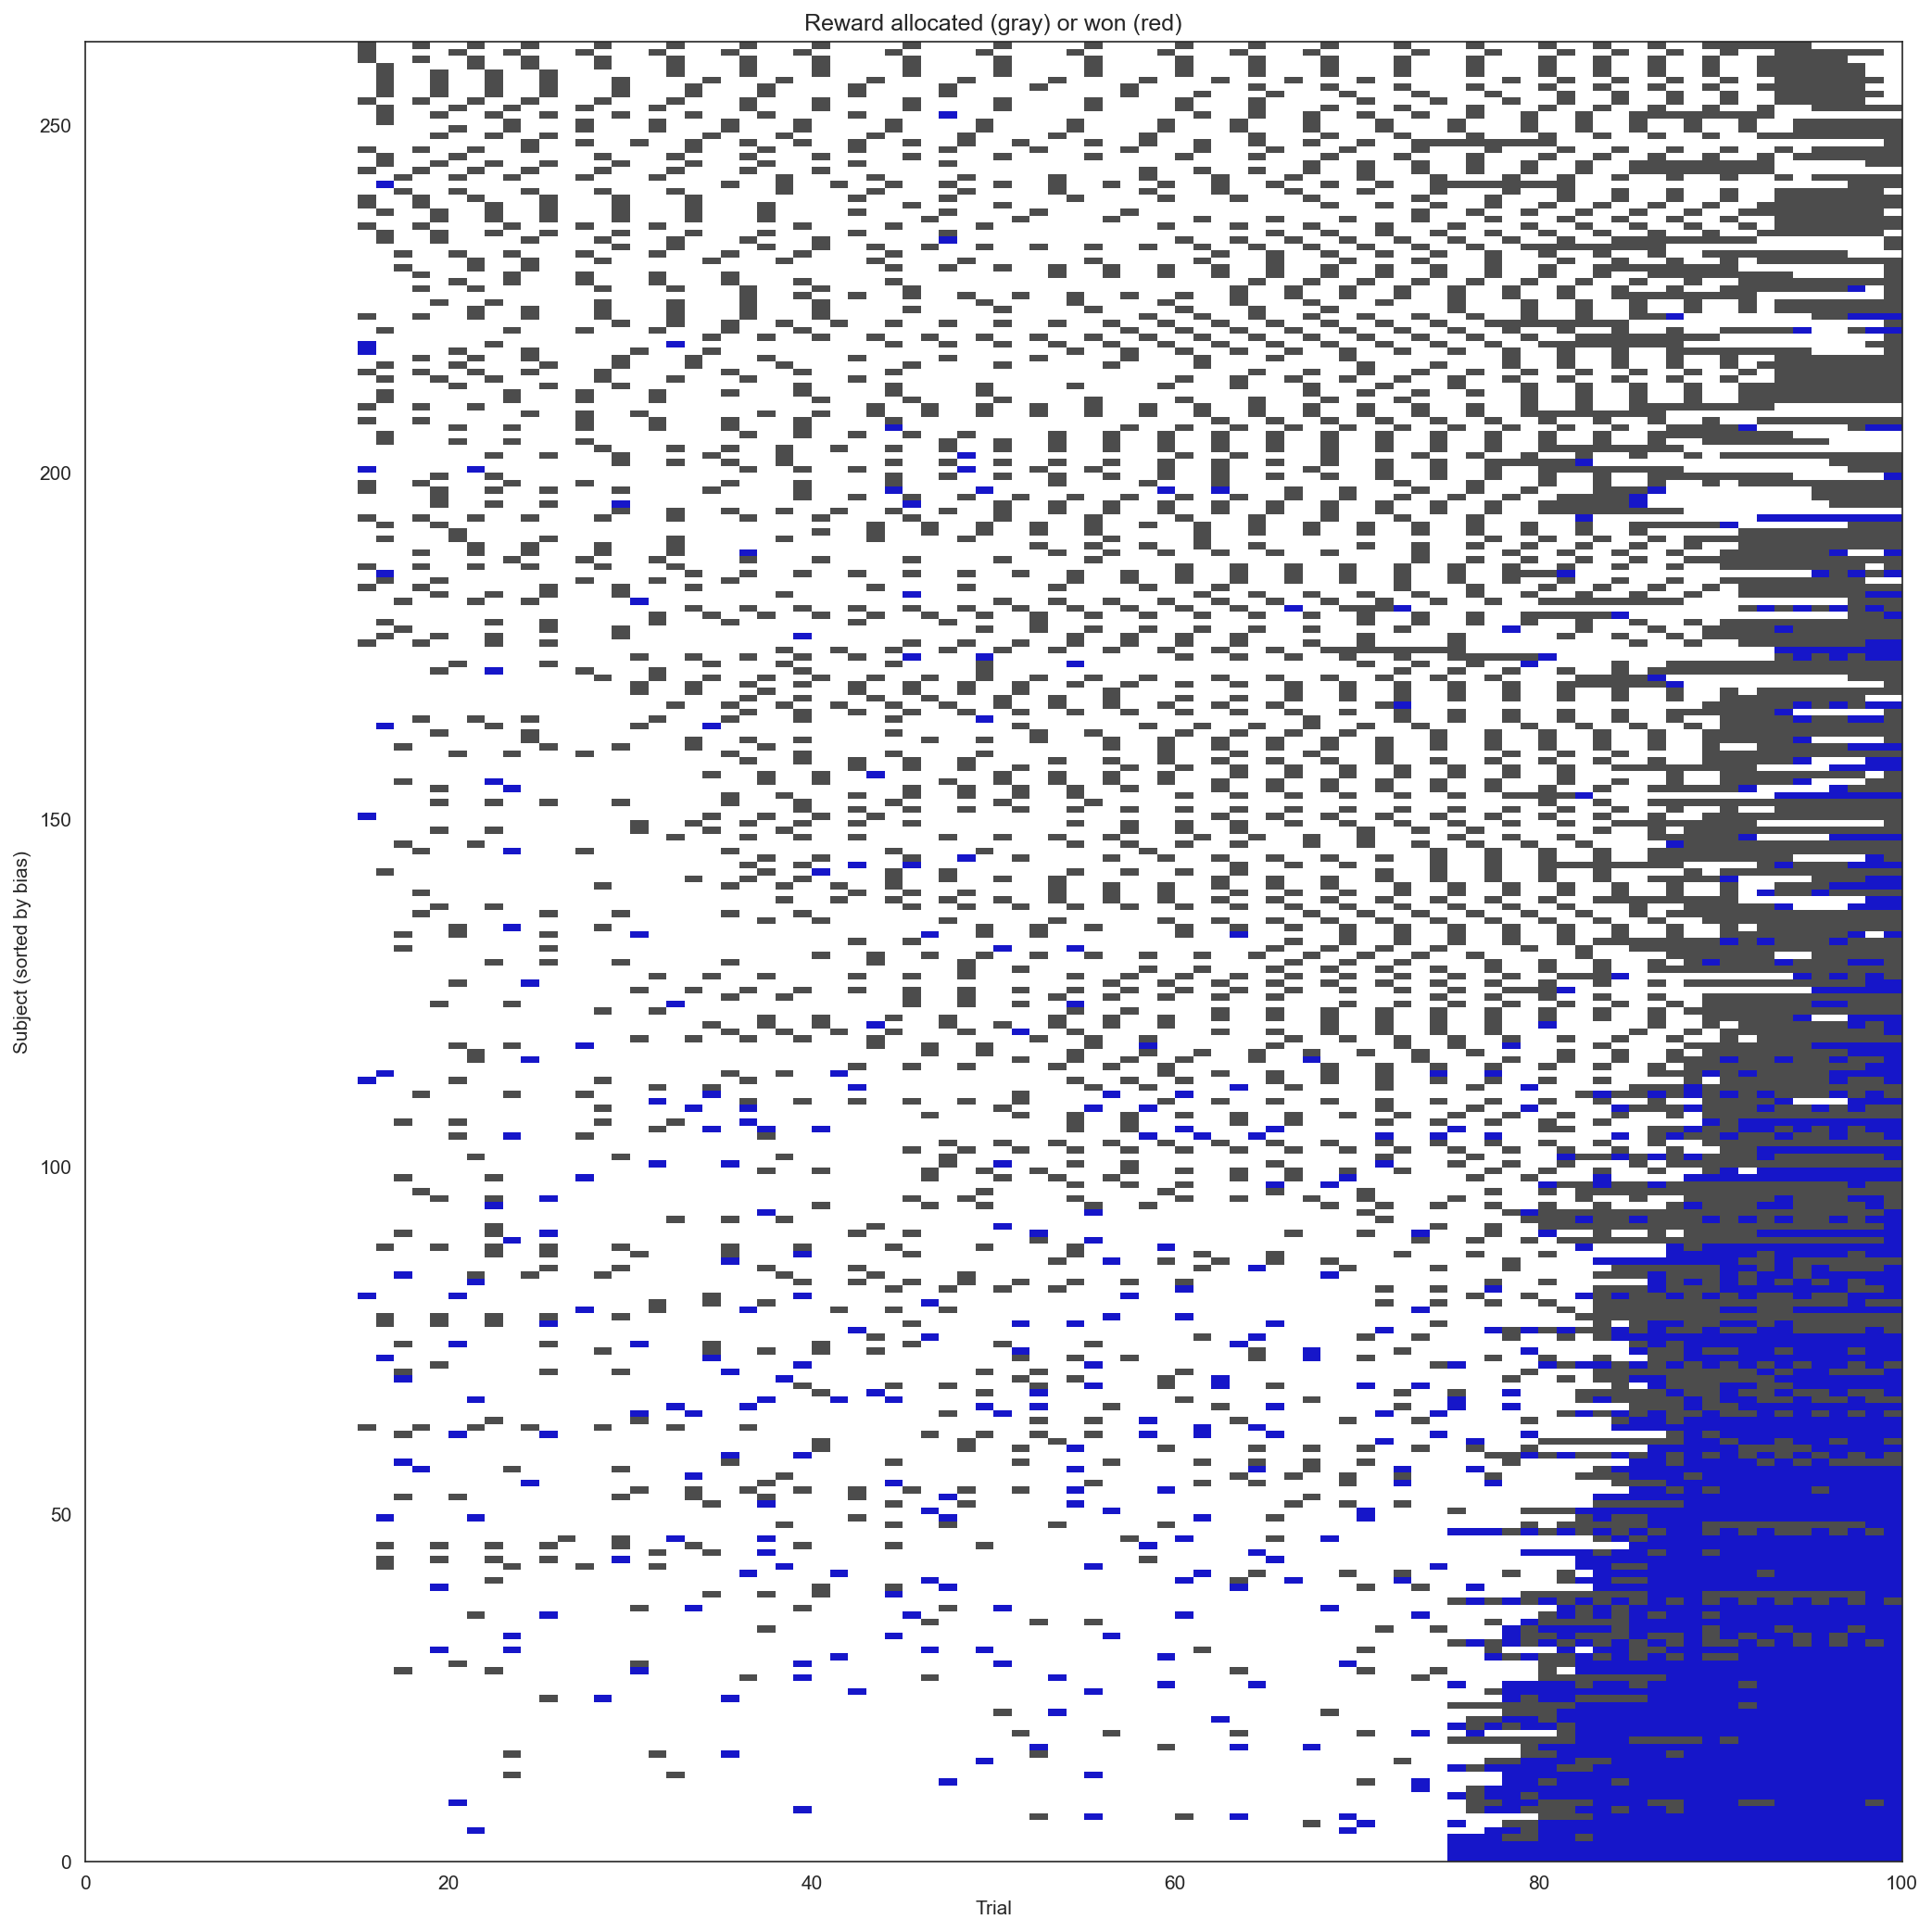

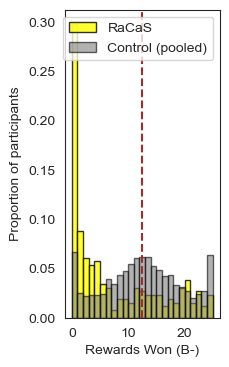

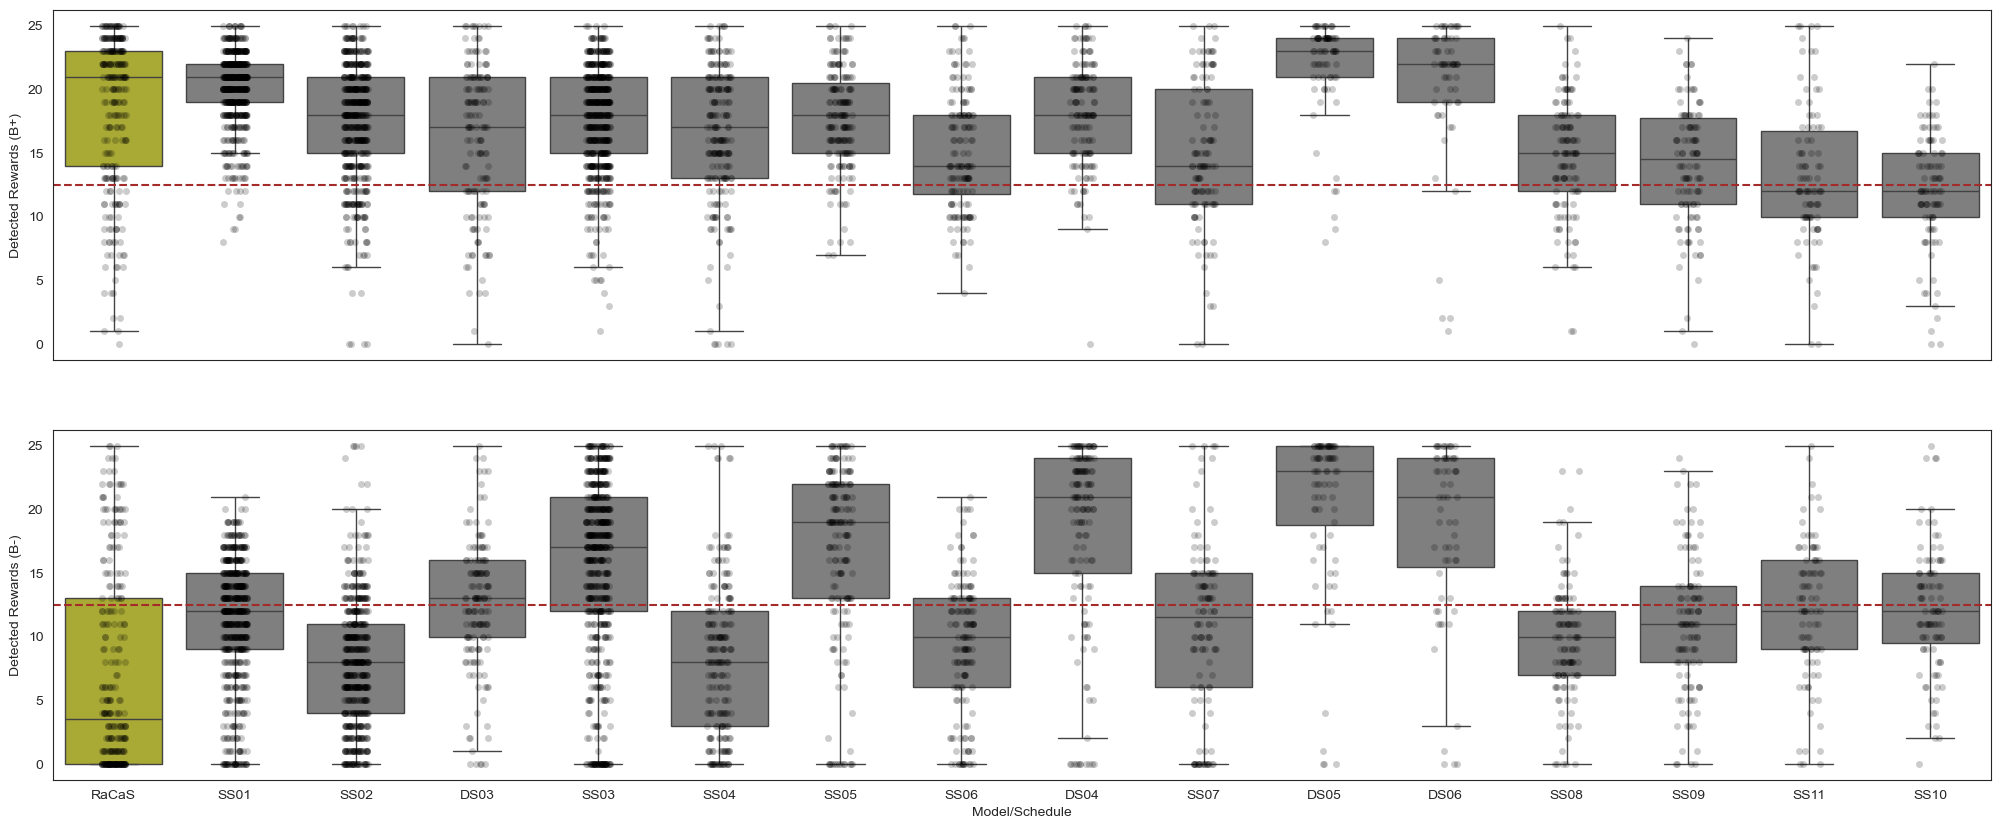

In [23]:

af.Sup_Figure_2(df_noPool_noSS00_noDS01_noDS02, df_Pool_RaCaS)

# Sup Figure 3

c:\Users\oren\Downloads\Specious_Regularity\analysis_functions.py:696: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  showfliers=False,palette=[colors[0]] + [colors[1]]*(len(sced_sort)-1))
c:\Users\oren\Downloads\Specious_Regularity\analysis_functions.py:698: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  showfliers=False,palette=[colors[0]] + [colors[1]]*(len(sced_sort)-1))


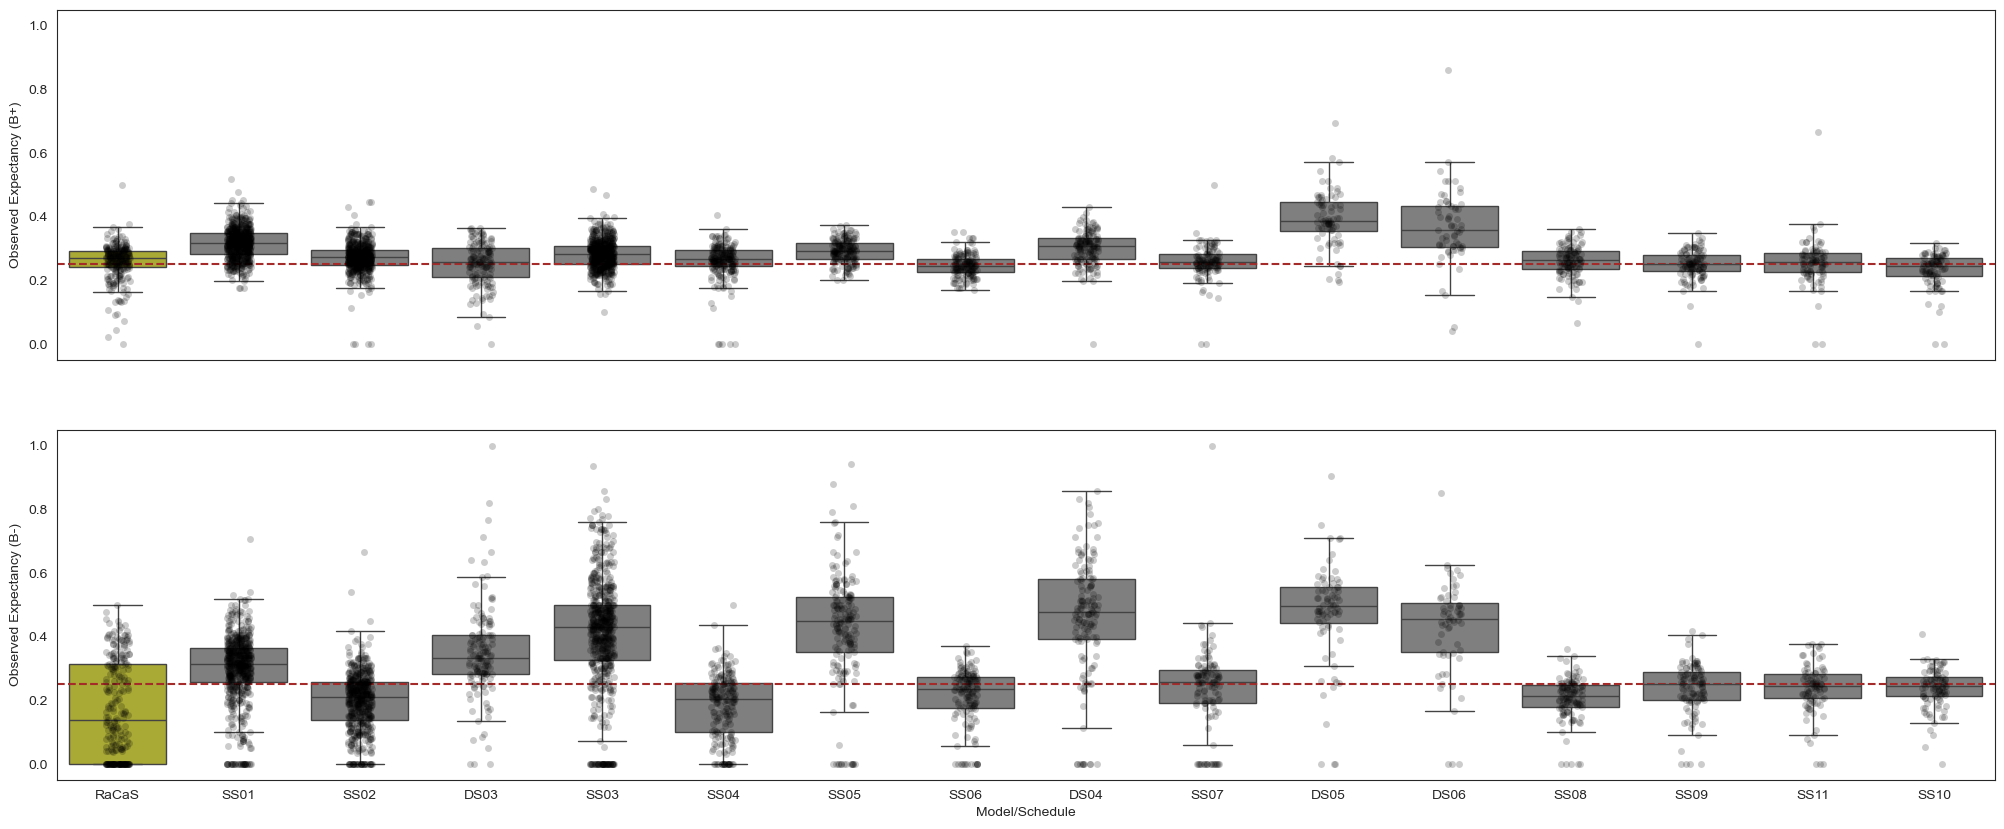

In [24]:

af.Sup_Figure_3(df_noPool_noSS00_noDS01_noDS02)

# Sup Figure 4

c:\Users\oren\Downloads\Specious_Regularity\analysis_functions.py:722: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  palette=[colors[0]] + [colors[1]]*(len(sced_sort)-1), showfliers=False)


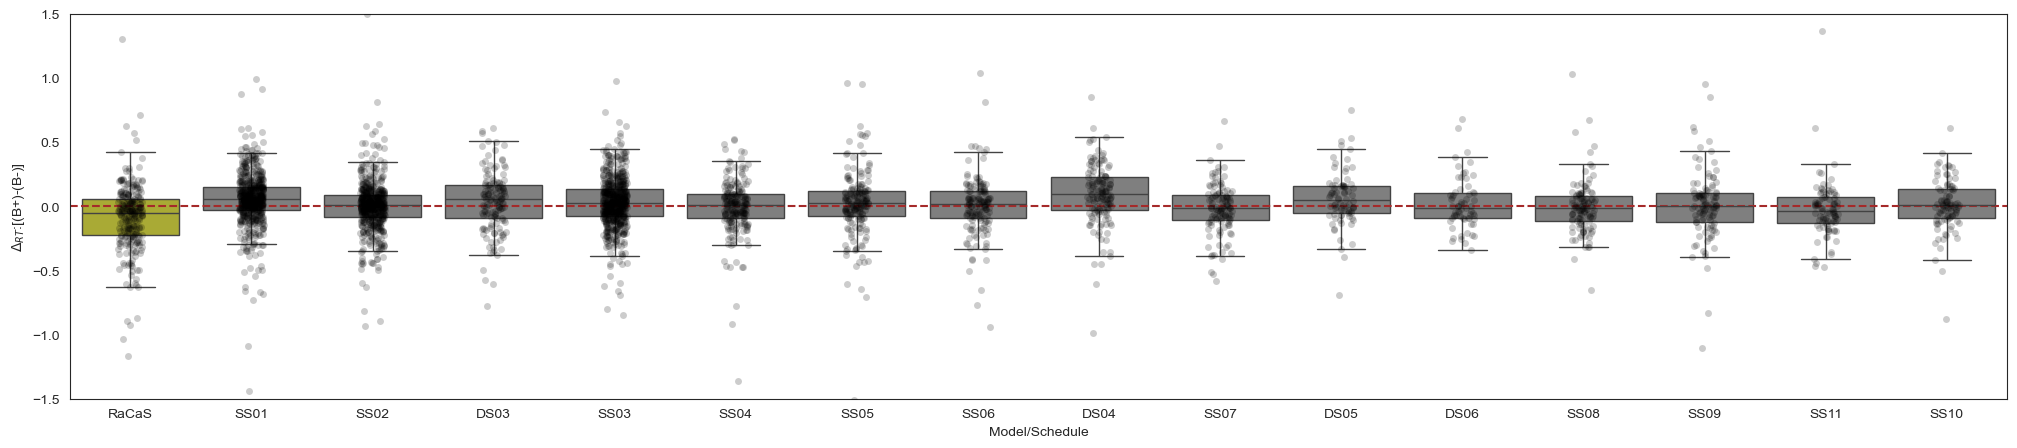

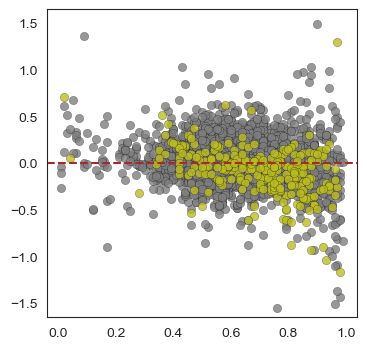

In [25]:

af.Sup_Figure_4(df_noPool_noSS00_noDS01_noDS02, df_Pool_RaCaS)

# Stats functions

In [48]:
import numpy as np
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

def rz_ci(r, n, conf_level = 0.95):
    zr_se = pow(1/(n - 3), .5)
    moe = norm.ppf(1 - (1 - conf_level)/float(2)) * zr_se
    zu = atanh(r) + moe
    zl = atanh(r) - moe
    return tanh((zl, zu))

def rho_rxy_rxz(rxy, rxz, ryz):
    num = (ryz-1/2.*rxy*rxz)*(1-pow(rxy,2)-pow(rxz,2)-pow(ryz,2))+pow(ryz,3)
    den = (1 - pow(rxy,2)) * (1 - pow(rxz,2))
    return num/float(den)

def independent_corr(xy, ab, n, n2 = None, twotailed=True, conf_level=0.95, method='fisher'):
    """
    Calculates the statistic significance between two independent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between a and b
    @param n: number of elements in xy
    @param n2: number of elements in ab (if distinct from n)
    @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'fisher' or 'zou'
    @return: z and p-val
    """

    if method == 'fisher':
        xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
        ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
        if n2 is None:
            n2 = n

        se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
        diff = xy_z - ab_z
        z = abs(diff / se_diff_r)
        p = (1 - norm.cdf(z))
        if twotailed:
            p *= 2

        return z, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(ab, n2, conf_level=conf_level)[0]
        U2 = rz_ci(ab, n2, conf_level=conf_level)[1]
        lower = xy - ab - pow((pow((xy - L1), 2) + pow((U2 - ab), 2)), 0.5)
        upper = xy - ab + pow((pow((U1 - xy), 2) + pow((ab - L2), 2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')
        
stats_per_model = {}

# Sup Figure 5

r260=0.43742735219943824
r545=0.61071594195494
r206=0.6779084450562307
r260=0.4842326057035933
r545=0.23110427758134322
r206=0.4510527733252374


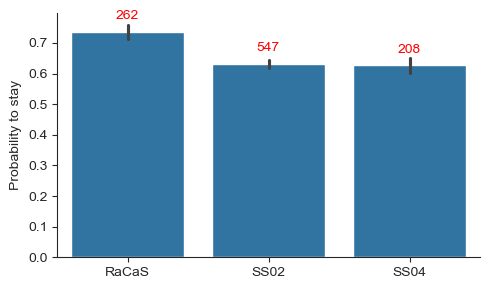

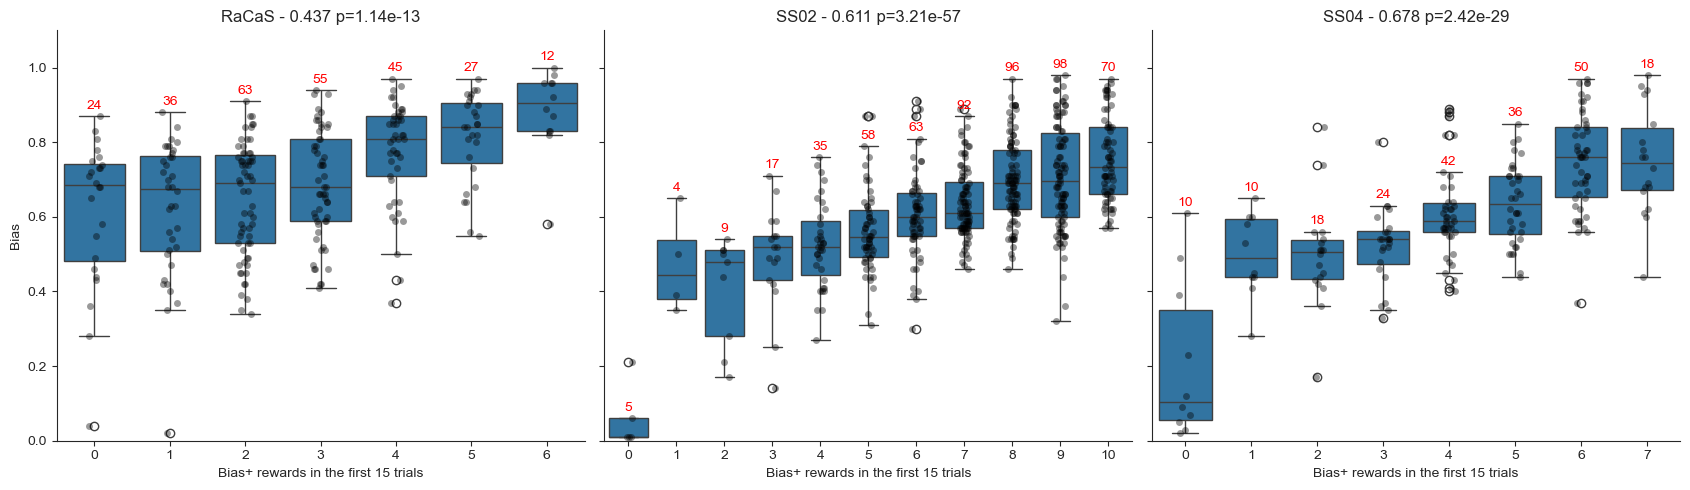

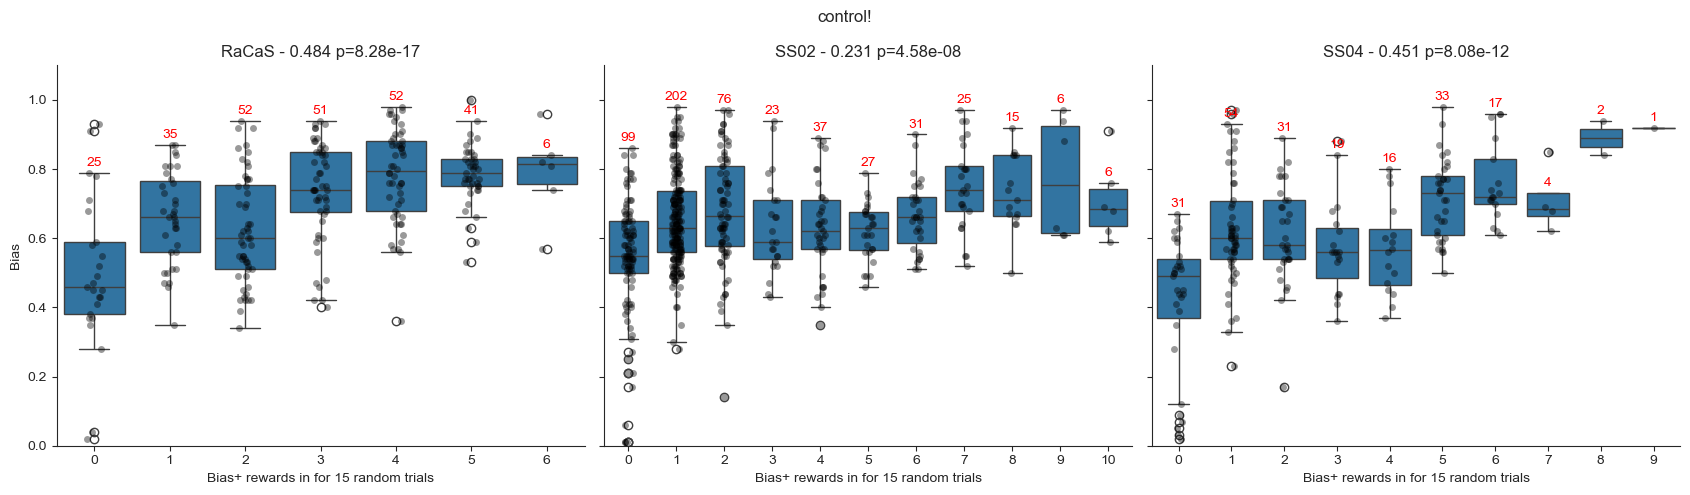

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
sns.set_style("ticks")
axs  = plt.subplots(1,1,figsize=(5,3))[1]
stayed = []
model = []
for j,model_type in enumerate(['RaCaS','SS02','SS04']):#, 'All']):
    if model_type == 'All':
        df_analysis = df_postprocess.query('`Model/Schedule` not in ["RaCaS","SS02","SS04","Control (pooled)"]')
    else:
        df_analysis = df_postprocess.query('`Model/Schedule` == @model_type')
    
    
    
    for _, row in df_analysis.sort_values('Bias',ascending=False).iterrows():
        stayed.append(np.mean(row['data'][1:].is_choice_1.values == row['data'][:99].is_choice_1.values))
        model.append(model_type)
        
        
df_strike = pd.DataFrame({'stayed':stayed,'model':model}).sort_values("model")
sns.barplot(df_strike,x='model',y='stayed')
try:
    axs.bar_label(axs.containers[0],padding=7, labels=pd.DataFrame(df_strike.model.value_counts()).sort_values("model").values.flatten(),color='red');
except:
    pass

plt.xlabel("")
plt.ylabel("Probability to stay")
plt.tight_layout()
sns.despine()
# plt.savefig('outputs/new_sup_figures/prob_to_stay.pdf')


# contorl resilts will probably be different between computer types
for control in [False,True]:
    axs  = plt.subplots(1,3,sharey=True, figsize=(17,5))[1].flatten()
    max_trials = 15
    rnd = np.random.RandomState(10)

    for j,model_type in enumerate(['RaCaS','SS02','SS04']):#,'All']):
        plt.sca(axs[j])
        if model_type == 'All':
            df_analysis = df_postprocess.query('`Model/Schedule` not in ["RaCaS","SS02","SS04","Control (pooled)"]')
        else:
            df_analysis = df_postprocess.query('`Model/Schedule` == @model_type')
        r_wons = []
        bias = []

        for _, row in df_analysis.sort_values('Bias',ascending=False).iterrows():
            #r_wons.append(row['data']['won_reward_at_1'].values[:max_trials].sum() - row['data']['won_reward_at_2'].values[:max_trials].sum())
            exp_n = row['data']['won_reward_at_1']
            if control:
                st = rnd.randint(0,99-max_trials)
                r_wons.append(exp_n.values[st:st+max_trials].sum())
            else:
                r_wons.append(exp_n.values[:max_trials].sum())
            
            bias.append(row.Bias)


        
        dd = pd.DataFrame({'r_wons':r_wons,'bias':bias})
        g = sns.boxplot(dd,x='r_wons',y='bias',ax=axs[j])
        sns.stripplot(dd,x='r_wons',y='bias',color='black',alpha=0.4,ax=axs[j])
        
        R,P = stats.pearsonr(r_wons,bias)
        print(f'r{len(r_wons)-2}={R}')
        for i in np.sort(list(set(dd.r_wons))):
            tm = dd.query("r_wons==@i")
            txt_loc = boxplot_stats(tm.values)[1]['whishi']
            plt.text(i,txt_loc+0.02,len(tm),ha='center', color='red')

        plt.title(f'{model_type} - {R:.3} p={P:.3}')
        if control == False:
            plt.xlabel('Bias+ rewards in the first 15 trials')
        else:
            plt.xlabel('Bias+ rewards in for 15 random trials')
        plt.ylim(0,1.1)
        if j==0:
            plt.ylabel("Bias")
        else:
            plt.ylabel("")
        stats_per_model[(control,model_type)] = {'R':R,'P':P,'n':len(r_wons)}
    if control:
        plt.suptitle('control!')
    plt.tight_layout()
    sns.despine()
    if control:
        pass
        # plt.savefig('outputs/new_sup_figures/first_trials_control.pdf')
    else:
        pass
        # plt.savefig('outputs/new_sup_figures/first_trials.pdf')

    


# Supp figure 6

r182 = 0.1213828942180847, 0.1007202516757794
0.6339673913043478
0.6986259541984733
r511 = 0.528982339734379, 2.4989456819354003e-38
0.6242690058479533
0.6416087751371116
r184 = 0.605071647220869, 5.866139053366177e-20
0.5833333333333334
0.614423076923077


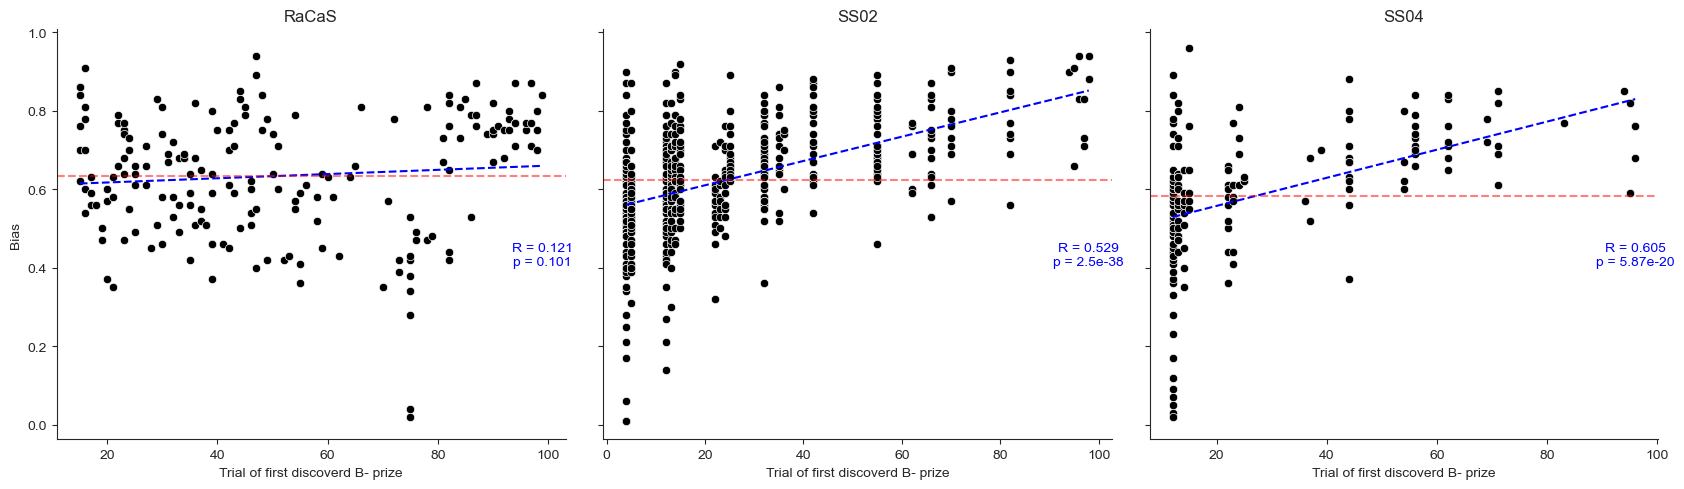

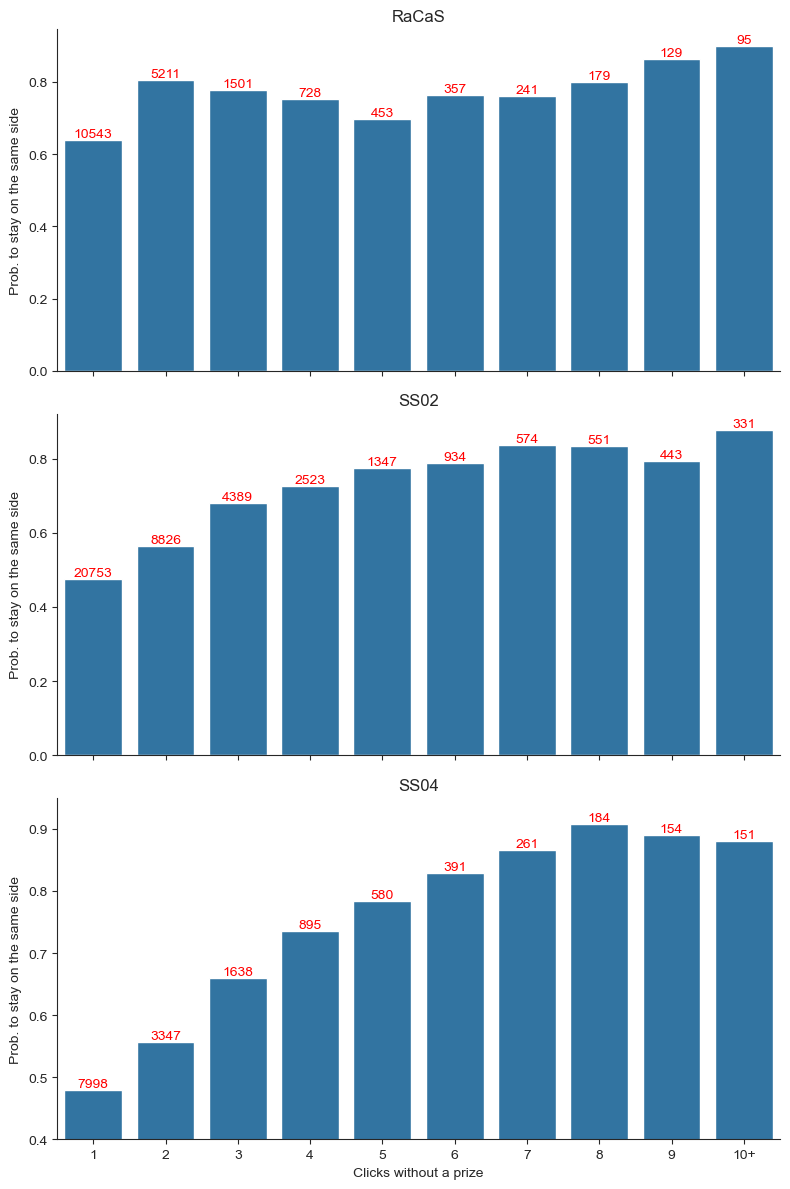

In [62]:
sns.set_style("ticks")
axs  = plt.subplots(1,3,sharey=True, figsize=(17,5))[1].flatten()
for j,model_type in enumerate(['RaCaS','SS02','SS04']):
    plt.sca(axs[j])
    if model_type == 'All':
        df_analysis = df_postprocess.query('`Model/Schedule` not in ["RaCaS","SS02","SS04","Control (pooled)"]')
    else:
        df_analysis = df_postprocess.query('`Model/Schedule` == @model_type')
    r_wons = []
    bias = []
    
    for _, row in df_analysis.sort_values('Bias',ascending=False).iterrows():
        locs = np.where(row['data']['won_reward_at_2'])[0]
        if len(locs) ==0:
            r_wons.append(None)
            bias.append(row.Bias)
        else:
            r_wons.append(locs[0])
            bias.append(row.Bias)


    r_wons = np.array(r_wons) 
    bias = np.array(bias) 

    dd = pd.DataFrame({'r_wons':r_wons,'bias':bias}).sort_values('r_wons')
    #sns.boxplot(dd,x='r_wons',y='bias')
    sns.scatterplot(dd,x='r_wons',y='bias',color='black')
    # print(len(r_wons))
    x = r_wons[~pd.isnull(r_wons) & ~pd.isnull(r_wons)].astype(float)
    y = bias[~pd.isnull(r_wons) & ~pd.isnull(r_wons)].astype(float)
    # R,P = stats.pearsonr(x,y)
    R,P = stats.spearmanr(x,y)
    print(f'r{len(x)-2} = {R}, {P}')
    m, b = np.polyfit(x, y, 1)
    #add linear regression line to scatterplot 
    xx = np.arange(min(x),max(x),0.02)
    plt.text(x= max(x)-.03
             ,y=0.4,ha='center',s=f'R = {R:3.3}\np = {P:3.3}',va='bottom',color='blue')
    plt.plot(xx, m*xx+b,'--',color='blue')
    
    plt.axhline(np.mean(y),ls='--',color='red',alpha=0.5)
    print(np.mean(y))
    print(np.mean(bias))
    plt.title(f'{model_type}')# - {R:.3} p={P:.3}')
    if j==0:
        plt.ylabel("Bias")
    else:
        plt.ylabel("")
    
    plt.xlabel("Trial of first discoverd B- prize")
sns.despine()
plt.tight_layout()
# plt.savefig("outputs/new_sup_figures/trial_first_vs_bias.pdf")



import numpy as np
only_ends = False
axs  = plt.subplots(3,1,sharex=True,figsize=(8,12))[1].flatten()
for j,model_type in enumerate(['RaCaS','SS02','SS04']):#,'All']):
    plt.sca(axs[j])
    if model_type == 'All':
        df_analysis = df_postprocess.query('`Model/Schedule` not in ["RaCaS","SS02","SS04","Control (pooled)"]')
    else:
        df_analysis = df_postprocess.query('`Model/Schedule` == @model_type')

    unprized_click = []
    stayed = []
    for iii, row in df_analysis.sort_values('Bias',ascending=False).iterrows():
        y = (row['data']['is_choice_1']==1) & (row['data']['won_reward_at_1']==0)
        row['data']['at_2_tm'] = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)
        
        if only_ends:
            locs_to_check = np.where(row['data']['at_2_tm'].diff()<0)[0]
        else:
            locs_to_check = np.where(row['data']['at_2_tm'])[0]+1
            
        for i in locs_to_check:
            if i in [0,100]:
                continue
            unprized_click.append(row['data'].loc[i-1].at_2_tm)
            stayed.append(row['data'].loc[i-1].is_choice_1 == row['data'].loc[i].is_choice_1)

        y = (row['data']['is_choice_1']==0) & (row['data']['won_reward_at_2']==0)
        row['data']['at_1_tm'] = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)
        
        if only_ends:
            locs_to_check = np.where(row['data']['at_1_tm'].diff()<0)[0]
        else:
            locs_to_check = np.where(row['data']['at_1_tm'])[0]+1
            
        for i in locs_to_check:
            if i in [0,100]:
                continue
            unprized_click.append(row['data'].loc[i-1].at_1_tm)
            stayed.append(row['data'].loc[i-1].is_choice_1 == row['data'].loc[i].is_choice_1)
    
    df_strike = pd.DataFrame({'unprized_click':unprized_click,'stayed':stayed})
    df_strike.loc[df_strike.query('unprized_click>9').index,'unprized_click'] = 10
    sns.barplot(df_strike,x='unprized_click',y='stayed',errorbar=None)
    # sdf
    #print(model,df_strike.query('unprized_click<10').groupby('unprized_click').stayed.mean())
    axs[j].bar_label(axs[j].containers[0], labels=df_strike.unprized_click.value_counts(),color='red');
    plt.title(f'{model_type}')
    plt.ylabel("Prob. to stay on the same side")
    
    plt.xlabel("")
plt.xlabel("Clicks without a prize")
plt.xticks(range(10),list(range(1,10)) + ['10+'])
plt.ylim(0.4,0.95)
plt.tight_layout()
sns.despine()
# plt.savefig("outputs/new_sup_figures/click_with_no_prize_VS_prob.pdf")